# I. Overview

In this assignment, the main objective is get a deeper understand of neural network and nonlinear regression model, as well as deep learning.
- Use cross validation to find good parameters for a neural network when applied into regression.
- Use cross validation to find good parameters for a neural network when applied into classification.
- Learn how to tensor flow to implement neural network for deep learning. 

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification).

- UCI Machine Learning Repository:
- Bike Sharing Dataset Data Set
- https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


## Description of your data

Bike Sharing Dataset Data Set 
- Number of Instances: 17389
- Number of Attributes: 16
- Associated Tasks: Regression
- Attribute Characteristics: Integer, Real

## Reading the data

In [768]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [769]:
df = pd.read_csv("hour.csv")
df.info()
df.describe()
list(df.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [3]:
# Test on missing value
missVal_df = (df.isnull().sum()/len(df)) * 100
print(missVal_df)

age                 0.0
workclass           0.0
fnlwgt              0.0
education           0.0
education-number    0.0
marital-status      0.0
occupation          0.0
relationship        0.0
race                0.0
sex                 0.0
capital-gain        0.0
capital-loss        0.0
hours-per-week      0.0
native-country      0.0
Class               0.0
dtype: float64


## Plots to visualize data

From the barplot below, we can see that there are two peaks, one is 8am, the other is 5pm, which is reasonable, for this two are the rush hour in the morning and evening, so there is a high demand in renting bikes.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


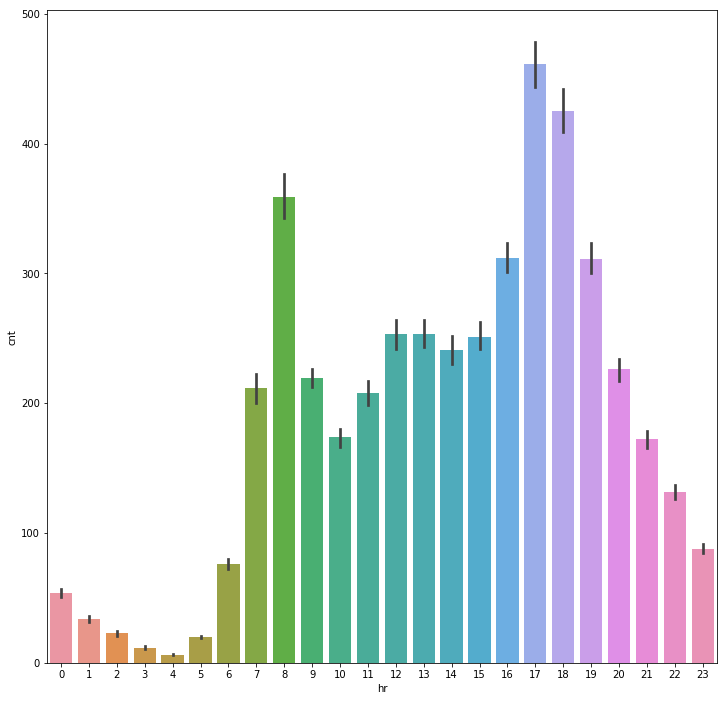

In [13]:
plt.figure(figsize=(12,12))
sns.barplot(data=df, x="hr", y="cnt")

From the pointplot below we can see that with the temp(temperature) raise, cnt(count) is increasing. which means when the temp is comfortable for the user to use bikes, then more and more user will choose rent bike.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


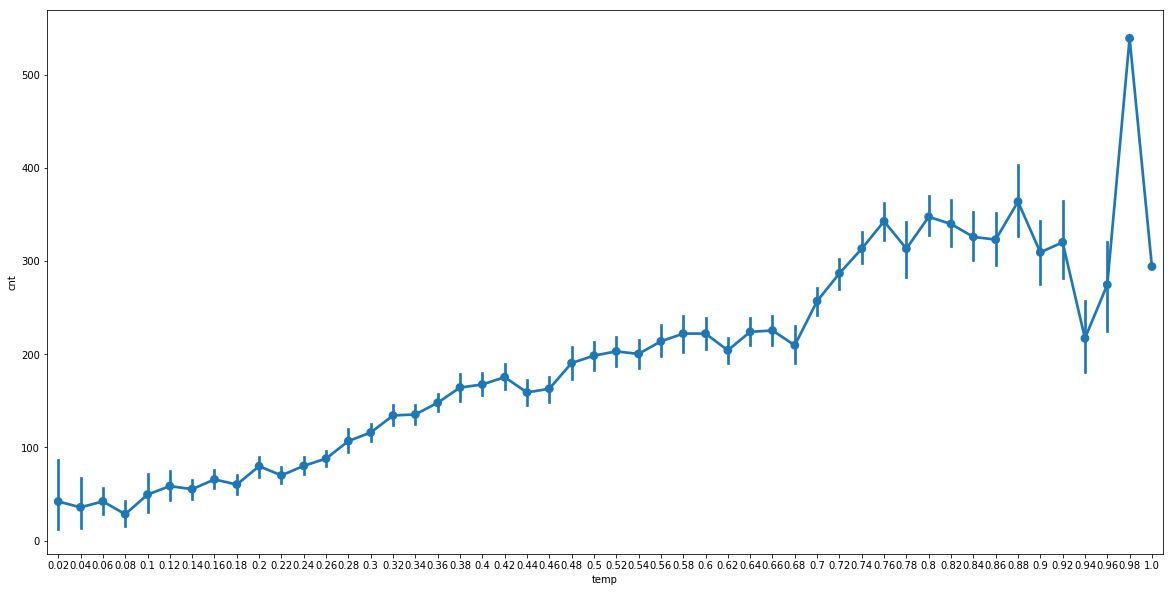

In [15]:
plt.figure(figsize=(20,10))
sns.pointplot(data=df, x="temp", y="cnt")

## Analyzing the plots

1. From the barplot, we can see that there are two peaks, one is 8am, the other is 5pm, which is reasonable, for this two are the rush hour in the morning and evening, so there is a high demand in renting bikes.

2. From the pointplot, we can see that with the temp(temperature) raise, cnt(count) is increasing. which means when the temp is comfortable for the user to use bikes, then more and more user will choose renting bike.

# III. Methods

- Summarize the nonlinear regression model. 
- Use the NeuralNet class for regression to apply to your data. 
- Explain your codes. 
- Explain and use 5-fold cross validation to find a good neural network parameters including the structure and report the test accuracy. 

## Summary of Neural Networks

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Xlm}{\mathbf{X1}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Vm}{\mathbf{V}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Zlm}{\mathbf{Z1}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Phiv}{\boldsymbol\Phi}
$
#### Neural Networks

Neural networks, or artificial neural networks, are the computational models inspired by the brain. Mimicing the neurons' synaptic connecions (Figure 1), we build or stack multiple neuron-like hidden units to map data into nonlinear space for rich representation. 

<img src="https://upload.wikimedia.org/wikipedia/commons/1/10/Blausen_0657_MultipolarNeuron.png" width=500/>
<center>Figure 1. Anatomy of a neuron (wikipedia) </center>

Now, let us review the perceptron model. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/perceptron.png" width=600 />

In perceptron, passing the output of linear model to the step function, we get discrete outputs. 
Now, you can think a perceptron as a neuron. With a threshold zero, when the linear model outputs are over it, it passes the signal to next neuron. 

By connecting the perceptrons, we can actually build synaptic connections.
We call this model as *multi-layer perceptron* (MLP). 


#### Feed Forward Neural Networks

Fitting the data with MLP is a combinatorial optimization problem with non-smooth step function. 
So, we can consider smooth step function, a s-shaped sigmoid function. 
We call this smooth function as **activation function**.

## Summarize the nonlinear regression model.

Previously, we learned the linear logistic regression that uses the softmax layer for classification along with a linear model. 

$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

By using this softmax function, we were able to generate probablistic outputs for all classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. 
Following the derivation, we have achieved the following update rule: 



$$
\wv_j \leftarrow \wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(\xv_n)\Big) \xv_n.
$$

To update the weights with batch samples, we can convert this update rule in matrix form as follows:

$$
\wv \leftarrow \wv + \alpha \Xm^\top \Big(  \Tm - g(\Xm)\Big).
$$

Remember we start from the error function below for the derivation bvefore:

$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/linearlogreg.png" width=450 />



#### Nonlinear Extension with Neural Networks

Now, we extend this to two layer neural networks. Similar to the derivation of neural network for regression, we can derive the gradient by switching the squuared error with the negative log likelihood function above. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/nonlinearlogreg.png" width=600 />



From the error function $E(\wv)$, we can derive the gradient to update the weights for each layer. 


$$
\begin{align}
v_{dg} &\leftarrow v_{dg} - \alpha_h \frac{\partial{E(\Wm, \Vm)}} {\partial{v_{dg}}} \\ 
\\ 
w_{gk} &\leftarrow w_{gk} - \alpha_o \frac{\partial{E(\Wm, \Vm)}} {\partial{w_{gk}}},
\end{align}
$$

where $\alpha_h$ and $\alpha_o$ are the learning rate for hidden and output layer respectively. Here, we denote the output of the neural network as $\kappa$. 

$$
\begin{align}
\frac{\partial{E}}{\partial{w_{gk^\prime}}} &= -\frac{\partial{\Big( \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} \ln g_{nk}(\xv_n))} \Big)}{\partial{w_{gk^\prime}}} \\
   \\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k^\prime}(\xv_n)} \frac{\partial g_{n,k^\prime}(\xv_n)}{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k^\prime}(\xv_n)} \frac{\partial g_{n,k^\prime}(\xv_n)}{\partial  \kappa_{nk}} \frac{\partial  \kappa_{nk} }{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k^\prime}(\xv_n)} g_{nk^\prime}(\xv_n) (I_{kk^\prime} - g_{nk^\prime}(\xv_n))  \frac{\partial  \kappa_{nk} }{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n))  \frac{\partial  \sum_{g=0}^{G} z1_{ng} w_{gk}  }{\partial  {w_{gk^\prime}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) z1_{nk^\prime}\\
    &= -\sum_{n=1}^{N} \Big(\sum_{k=1}^{K}  t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \Big) z1_{nk^\prime}\\
    &= -\sum_{n=1}^{N} \Big( \sum_{k=1}^{K} t_{n,k} I_{kk^\prime} - g_{nk^\prime}(\xv_n) \sum_{k=1}^{K} t_{n,k}  \Big) z1_{nk^\prime}\\
    &= -\sum_{n=1}^{N} \Big( t_{n,k^\prime} - g_{nk^\prime}(\xv_n) \Big) z1_{nk^\prime}.
\end{align}
$$

Coverting this gradient in matrix form and reflecting it on our weight update,

$$
\Wm \leftarrow \Wm + \alpha_o \Zlm^\top \Big(  \Tm - g(\Xm)\Big).
$$

Now let us update the weight $v$ for the hidden layer. 
For the hidden layer, we repeat this: 

$$
\begin{align}
\frac{\partial{E}}{\partial{v_{dg}}} &= \frac{\partial{\Big( \frac{1}{N} \frac{1}{K} \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} \ln g_{nk}(\xv_n))}  \Big)}{\partial{v_{dg}}} \\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)}{\partial  {v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)} {\partial \kappa_{nk}} \frac{\partial \kappa_{nk}} {\partial  {v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)} {\partial \kappa_{nk}} \sum_{g=0}^G w_{gk} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} \frac{\partial{a_{ng}}}{\partial{v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \sum_{g=0}^G w_{gl} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} \frac{\partial{a_{ng}}}{\partial{v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \sum_{g=0}^G w_{gk} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} x1_{nd}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \sum_{g=0}^G w_{gk} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} x1_{nd}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk^\prime} - g_{nk^\prime}(\xv_n)) \sum_{g=0}^G w_{gk} (1 - z_{ng}^2) x1_{nd}.
\end{align}
$$

Again, coverting in matrix form for the hidden weight update,


$$
\Vm \leftarrow \Vm + \alpha_h \Xlm^\top \Big( (\Tm - g(\Xm)) \Wm^\top \odot (1 - \Zm^2) \Big).
$$

Here, $\odot$ denotes the element-wise multiplication. 

## Use the NeuralNet class for regression to apply to your data.

In [770]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 
    

In [771]:

""" Neural Network 
        referenced NN code by Chuck Anderson in R and C++ 

                                by Jake Lee (lemin)

    example usage:
        X = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
        T = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

        nn = nnet.NeuralNet([2,3,2])
        nn.train(X,T, wprecision=1e-20, fprecision=1e-2)
        Y = nn.use(X)

"""
from grad import scg, steepest
from copy import copy

class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            #print(self._W[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

###  Preliminary test 

I use my dataset for the preliminary test.

There are category features in the data, so first of all is to preprocessing the category features.

In [772]:
dummy_fields = ['season', 'mnth', 'weekday', 'weathersit', 'hr']
for each in dummy_fields:
    dummies = pd.get_dummies( df.loc[:, each], prefix=each ) 
    df = pd.concat( [df, dummies], axis = 1)

# As cnt is the sum of registered and casual, so we remove them too.
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'mnth', 'workingday', 'hr', 'registered', 'casual']
df = df.drop(fields_to_drop, axis=1)

After preprocessing with category features, I set the X and Y for later use

In [773]:
X = df.drop('cnt', axis=1).values
X.shape

(17379, 57)

In [774]:
Y = df['cnt'].values.reshape(-1,1)
Y.shape

(17379, 1)

In [191]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
test_size=0.3, random_state=0)

In [192]:
nn = NeuralNet([57,2,1])

In [193]:
result = nn.train(x_train, y_train)

In [194]:
y_pred = nn.use(x_test)

In [195]:
print(y_pred)

[[  1.48878343]
 [  2.54886662]
 [545.7180468 ]
 ...
 [361.82497178]
 [291.85017804]
 [237.04978606]]


In [196]:
print(y_test)

[[  7]
 [  5]
 [743]
 ...
 [499]
 [302]
 [229]]


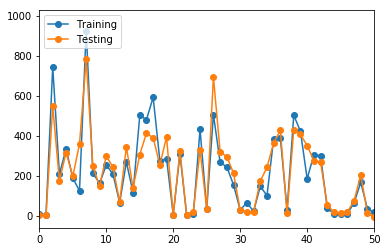

In [197]:
plt.plot(y_test,'o-', y_pred,'o-')
plt.xlim(0,50)
plt.legend(('Training','Testing'),loc='upper left')
plt.show()

### Explain your codes

I reuse the code form class note of Nerual Networks. First, I train the data, and then use the model to make prediction.

We use the s-shaped sigmoid function as activation fuction.

We use below method to update the weight iteratively:  
$$
\begin{align}
\Vm &\leftarrow \Vm + \rho_h \frac{1}{N} \frac{1}{K} \Xlm^\top \Big( (\Tm - \Ym) \Wm^\top \odot (1 - \Zm^2) \Big), \\
\Wm &\leftarrow \Wm + \rho_o \frac{1}{N} \frac{1}{K} \Zlm^\top \Big( \Tm - \Ym \Big)
\end{align}
$$
where $\rho_h$ and $\rho_o$ are the learning rate for hidden and output layer weights. 

### Examination of correct implementation with preliminary test with explanation

In my preliminary test, I just use the regression data, as the shape of X is (17379, 57), and the shape of Y is (17379, 1), which means that the input layer is 57, and the output layer is 1, we can change the hidder layer.

Here, I set the sturcture as [57,2,1], and I plot the y_test and y_predict. 

### Explain and use 5-fold cross validation to find a good neural network parameters including the structure and report the test accuracy

I use 5-fold cross validation to compare three sturctures, they are NeuralNet([57,2,1]), ([57,10,1]) and ([57,20,30,1]), from the experiment results below, we can see that NeuralNet([57,10,1]) is the best, for it has comparable small error.

### 5-fold cross validation

#### nn = NeuralNet([57,2,1])

In [765]:
l = X.shape[0]
fold = 5
split_size = l//fold
i = 0
for k in range(fold):
    print('Fold', k+1)
    start = i
    split = i + split_size
    X_test = X[start:split]
    y_test = Y[start:split]
    
    X_train = np.vstack((X[0:start], X[split:split_size*5]))
    #X_train = X[split:split_size*5]
    y_train = np.vstack((Y[0:start], Y[split:split_size*5]))
    
    nn = NeuralNet([57,2,1])
    result = nn.train(X_train, y_train)
    y_pred = nn.use(X_test)
    error = np.sqrt(np.mean(((y_pred-y_test))**2))
    print(error)
    
    i = i + split_size

Fold 1
77.2018180965669
Fold 2
73.20113249997388
Fold 3
53.30121837644404
Fold 4
81.41856374916604
Fold 5
70.20018062471219


#### nn = NeuralNet([57,10,1])

In [766]:
l = X.shape[0]
fold = 5
split_size = l//fold
i = 0
for k in range(fold):
    print('Fold', k+1)
    start = i
    split = i + split_size
    X_test = X[start:split]
    y_test = Y[start:split]
    
    X_train = np.vstack((X[0:start], X[split:split_size*5]))
    #X_train = X[split:split_size*5]
    y_train = np.vstack((Y[0:start], Y[split:split_size*5]))
    
    nn = NeuralNet([57,10,1])
    result = nn.train(X_train, y_train)
    y_pred = nn.use(X_test)
    error = np.sqrt(np.mean(((y_pred-y_test))**2))
    print(error)
    
    i = i + split_size

Fold 1
49.614154291759576
Fold 2
53.731194408530605
Fold 3
95.54471561699968
Fold 4
74.29160611235545
Fold 5
72.08545256336498


#### nn = NeuralNet([57,20, 30, 1])

In [775]:
l = X.shape[0]
fold = 5
split_size = l//fold
i = 0
for k in range(fold):
    print('Fold', k+1)
    start = i
    split = i + split_size
    X_test = X[start:split]
    y_test = Y[start:split]
    
    X_train = np.vstack((X[0:start], X[split:split_size*5]))
    #X_train = X[split:split_size*5]
    y_train = np.vstack((Y[0:start], Y[split:split_size*5]))
    
    nn = NeuralNet([57,20, 30, 1])
    result = nn.train(X_train, y_train)
    y_pred = nn.use(X_test)
    error = np.sqrt(np.mean(((y_pred-y_test))**2))
    print(error)
    
    i = i + split_size

Fold 1
59.33151600899526
Fold 2
69.56649308763052
Fold 3
61.814854062950765
Fold 4
76.45594391865625
Fold 5
98.69060162385298


# IV - Results

- Presents the results of comparison of the tested models.
- Visualize the results 
- Discuss about the choice of parameters for each model 
- What do you think about the results? 

### Presents the results of comparison of the tested models and visualize the results /plots for results

#### When nn = NeuralNet([57,2,1])

In [213]:
nn = NeuralNet([57,2,1])
result = nn.train(X_train, y_train)
y_pred_1 = nn.use(X_test)
error1 = np.sqrt(np.mean(((y_pred_1-y_test))**2))
print(error1)

94.70098169409673


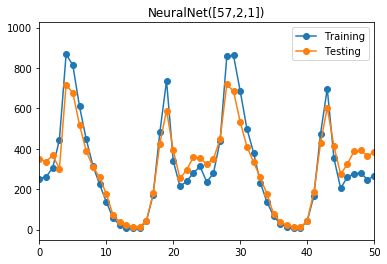

In [214]:
plt.plot(y_test,'o-', y_pred_1,'o-')
plt.title('NeuralNet([57,2,1])')
plt.xlim(0,50)
plt.legend(('Training','Testing'),loc='upper right')
plt.show()

#### When nn = NeuralNet([57,10,1])

In [215]:
# When nn = NeuralNet([57,10,1])
nn = NeuralNet([57,10,1])
result = nn.train(X_train, y_train)
y_pred_2 = nn.use(X_test)
error2 = np.sqrt(np.mean(((y_pred_2-y_test))**2))
print(error2)

65.19636953235441


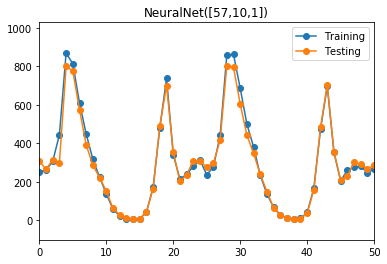

In [216]:
plt.plot(y_test,'o-', y_pred_2,'o-')
plt.title('NeuralNet([57,10,1])')
plt.xlim(0,50)
plt.legend(('Training','Testing'),loc='upper right')
plt.show()

#### When nn = NeuralNet([57,20,30,1])

In [217]:

nn = NeuralNet([57,20,30,1])
result = nn.train(X_train, y_train)
y_pred_3 = nn.use(X_test)
error3 = np.sqrt(np.mean(((y_pred_3-y_test))**2))
print(error3)

100.04838376926936


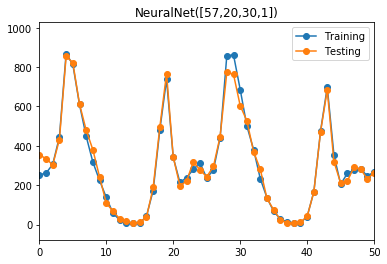

In [218]:
plt.plot(y_test,'o-', y_pred_3,'o-')
plt.title('NeuralNet([57,20,30,1])')
plt.xlim(0,50)
plt.legend(('Training','Testing'),loc='upper right')
plt.show()

### Discuss about the choice of parameters for each model / Discussions about parameter/network structure choice

From above comparison, we can see that NeuralNet([57,10,1]) gives the best performance among the three neural network we have chosen. 

The error of the three model are 
- NeuralNet([57,2,1])   94.70098169409673

- NeuralNet([57,10,1])  65.19636953235441

- NeuralNet([57,20,30,1])   100.04838376926936

Therefore, we will choose NeuralNet([57,10,1])

### What do you think about the results

- Sometimes, by adding more layers doesn't necessarily will improve the prediction performance.

- When deciding on how many hidder layers to choose, we needs to take the datasets into consideration.

### Discussion about the prediction results. Try to analyze what nonlinear regression model learned.

With nonlinear regression model, by applied with Neural network, the weitht can be updated by the output by backpropagation. At the same time, we can adjust the hidden layer, this is another way of tune the prediction model to give the best performance.

# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it.

- In this assignment, I mainly learn how to use the Neural network to do regression
- I have practiced cross validation, and by using cross validaiton we can find comparable more stable results.
- To adjust the hidden layer is a way of tuning the regression model, which can improve the prediction performance.

# Extra Credit

One extra credit is assigned when finish the following bullets. 

- Finish the following nonlinear logistic regression class and apply to your classification data. 
- Use cross validation to discover the best model. 

### Finish the following nonlinear logistic regression class and apply to your classification data

In [776]:
from nn import NeuralNet
from grad import scg, steepest
from utility import Standardizer


class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True
        pass


    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        def softmax(z):
            if not isinstance(z, np.ndarray):
                z = np.asarray(z)
            f = np.exp(z) 
            return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
         
        G = softmax(t)
        return (G, Z)
   
        pass

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.abs(T - Y)) + wpenalty
        pass

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.1)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result
        pass

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        classes = np.argmax(Y, 1)
        return classes, Y

#### Read the Data for Classification

In [777]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [778]:
df = pd.read_csv("adult.csv", names = ["age", "workclass", "fnlwgt", "education","education-number", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss","hours-per-week", "native-country", "Class"  ])          
df.info()
df.describe()
list(df.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                 32561 non-null int64
workclass           32561 non-null object
fnlwgt              32561 non-null int64
education           32561 non-null object
education-number    32561 non-null int64
marital-status      32561 non-null object
occupation          32561 non-null object
relationship        32561 non-null object
race                32561 non-null object
sex                 32561 non-null object
capital-gain        32561 non-null int64
capital-loss        32561 non-null int64
hours-per-week      32561 non-null int64
native-country      32561 non-null object
Class               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-number',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Class']

#### Preprocess the category data

In [779]:
df = pd.read_csv("adult.csv", names = ["age", "workclass", "fnlwgt", "education","education-number", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss","hours-per-week", "native-country", "Class" ], skipinitialspace=True, header=None)          
df.loc[df['Class'].str.contains(">50K"), 'Class'] = 1
df.loc[df['Class'].str.contains("<=50K", na=False), 'Class'] = 0
df['sex_num'] = np.where(df.sex == 'Female', 0, 1)
df['workclass_num'] = df.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})
df['marital_num'] = df['marital-status'].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5})
df['race_num'] = df.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
df['rel_num'] = df.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})

df.head()

,age,workclass,fnlwgt,education,education-number,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Class,sex_num,workclass_num,marital_num,race_num,rel_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,1,1.0,3,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1,3.0,4,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,1,0.0,1,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,1,0.0,4,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,0.0,4,1,1


#### Visualize the data

We first use violinplot below to find the relation between 'education-number' and 'Class', we can see that people earn less than 50k tend to have a 9 years education, and people who earn more than 50k, theie education is longer, the peak appears at 13 years.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


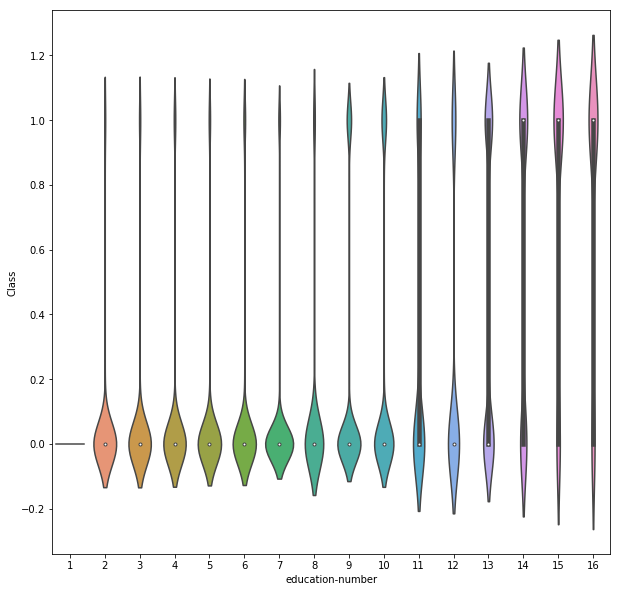

In [223]:
plt.figure(figsize=(10,10))
sns.violinplot(x="education-number", y="Class", data=df)

As to the race. We can see from the countplot below, white people make the most money, no matter less than or more than 50k.

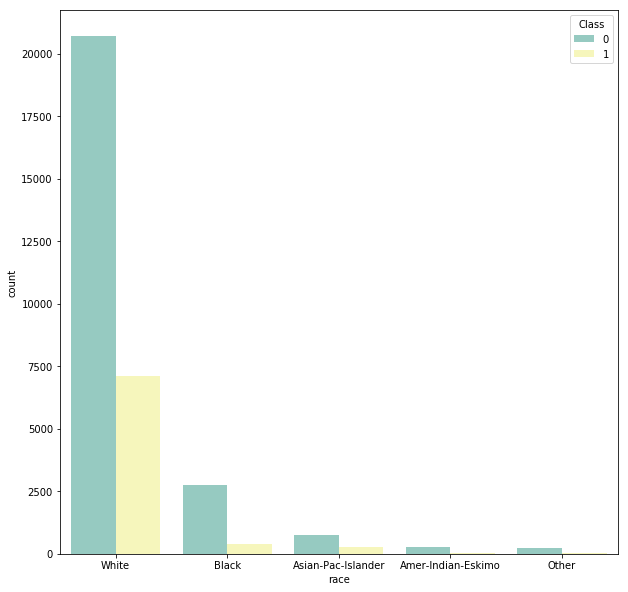

In [224]:
plt.figure(figsize=(10,10))
sns.countplot(x="race", hue="Class", palette="Set3", data=df)

In [780]:
df1 = df[['age', 'workclass_num', 'education-number', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital-gain', 'capital-loss','Class']]
df1.head()

,age,workclass_num,education-number,marital_num,race_num,sex_num,rel_num,capital-gain,capital-loss,Class
0,39,1.0,13,3,0,1,0,2174,0,0
1,50,3.0,13,4,0,1,1,0,0,0
2,38,0.0,9,1,0,1,0,0,0,0
3,53,0.0,7,4,1,1,1,0,0,0
4,28,0.0,13,4,1,0,1,0,0,0


In [781]:
Y = df1['Class'].values.reshape(-1,1)
Y.shape

(32561, 1)

In [782]:
X = df1[['workclass_num', 'education-number', 'race_num', 'rel_num']].values
print(X)
X.shape

[[ 1. 13.  0.  0.]
 [ 3. 13.  0.  1.]
 [ 0.  9.  0.  0.]
 ...
 [ 0.  9.  0.  0.]
 [ 0.  9.  0.  0.]
 [ 4.  9.  0.  1.]]


(32561, 4)

In [595]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
test_size=0.5, random_state=22)

In [596]:
clsf = NeuralNetLogReg([4, 2, 1])

In [597]:
result = clsf.train(x_train, y_train)

In [598]:
classes, Y = clsf.use(x_test)

Accuracy:  75.73859099563909 %


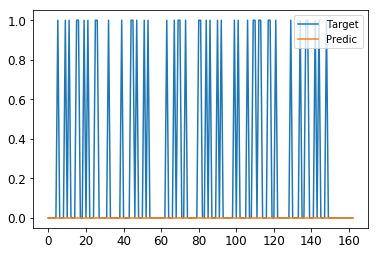

In [599]:
plt.plot(y_test[0::100], label='Target')
plt.plot(classes[0::100], label='Predic')
plt.legend(loc='upper right')

print("Accuracy: ", 100 - np.mean(np.abs(y_test - classes)) * 100, "%")

Accuracy:  75.47024952015354 %


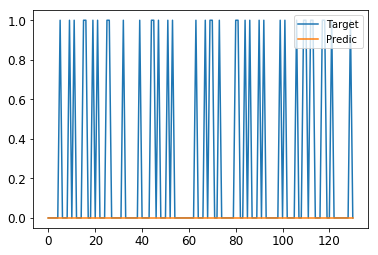

In [601]:
X = df1[['workclass_num', 'education-number', 'marital_num', 'race_num', 'rel_num']].values
Y = df1['Class'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
test_size=0.4, random_state=22)

clsf_1 = NeuralNetLogReg([5, 5, 1])
result_1 = clsf_1.train(x_train, y_train)
classes_1, Y_1 = clsf_1.use(x_test)

plt.plot(y_test[0::100], label='Target')
plt.plot(classes_1[0::100], label='Predic')
plt.legend(loc='upper right')

print("Accuracy: ", 100 - np.mean(np.abs(y_test - classes_1)) * 100, "%")

Accuracy:  76.10748560460652 %


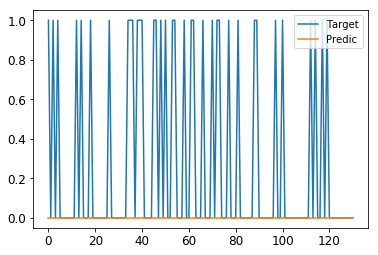

In [577]:
X = df1[['age', 'workclass_num', 'education-number', 'marital_num', 'race_num', 'rel_num']].values
Y = df1['Class'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
test_size=0.4, random_state=40)

clsf_2 = NeuralNetLogReg([6, 12, 1])
result_2 = clsf_2.train(x_train, y_train)
classes_2, Y_2 = clsf_2.use(x_test)

plt.plot(y_test[0::100], label='Target')
plt.plot(classes_2[0::100], label='Predic')
plt.legend(loc='upper right')

print("Accuracy: ", 100 - np.mean(np.abs(y_test - classes_2)) * 100, "%")

### Use cross validation to discover the best model

I compared with three model, by choosing different number of features and different number hidden layers.
they are NeuralNetLogReg([4, 2, 1]), NeuralNetLogReg([5, 5, 1]) and NeuralNetLogReg([6, 12, 1]), the three gives more or less the same accuracy, and among the three model I have chosen, NeuralNetLogReg([6, 12, 1]) gives comparable best performance, that is this model can achieve a little higher accuracy when comparied with the other two model.

#### NeuralNetLogReg([4, 2, 1])

- I keep 4 variable
- Hidden layer is 2

In [783]:
df1=df1.sample(frac=0.99)
X = df1[['workclass_num', 'education-number', 'race_num', 'rel_num']].values
Y = df1['Class'].values.reshape(-1,1)

l = X.shape[0]
fold = 5
split_size = l//fold
i = 0
for k in range(fold):
    print('Fold', k+1)
    start = i
    split = i + split_size
    X_test = X[start:split]
    y_test = Y[start:split]
    
    X_train = np.vstack((X[0:start], X[split:split_size*5]))
    #X_train = X[split:split_size*5]
    y_train = np.vstack((Y[0:start], Y[split:split_size*5]))
    
    expe1 = NeuralNetLogReg([4, 2, 1])
    result_expe1 = expe1.train(X_train, y_train)
    c_expe1, Y_expe1 = expe1.use(X_test)
    error_expe1 = 100 - np.mean(np.abs(y_test - c_expe1)) * 100
    print(error_expe1)
    
    i = i + split_size

Fold 1
75.80269892973476
Fold 2
76.09740964789825
Fold 3
75.50798821157127
Fold 4
76.46967581821002
Fold 5
75.70963238715682


#### NeuralNetLogReg([5, 5, 1])

- I keep 5 variable
- Hidden layer is 5

In [784]:
df1=df1.sample(frac=0.99)
X = df1[['workclass_num', 'education-number', 'marital_num', 'race_num', 'rel_num']].values
Y = df1['Class'].values.reshape(-1,1)

l = X.shape[0]
fold = 5
split_size = l//fold
i = 0
for k in range(fold):
    print('Fold', k+1)
    start = i
    split = i + split_size
    X_test = X[start:split]
    y_test = Y[start:split]
    
    X_train = np.vstack((X[0:start], X[split:split_size*5]))
    #X_train = X[split:split_size*5]
    y_train = np.vstack((Y[0:start], Y[split:split_size*5]))
    
    expe2 = NeuralNetLogReg([5, 5, 1])
    result_expe2 = expe2.train(X_train, y_train)
    c_expe2, Y_expe2 = expe2.use(X_test)
    error_expe2 = 100 - np.mean(np.abs(y_test - c_expe2)) * 100
    print(error_expe2)
    
    i = i + split_size

Fold 1
75.97931682858038
Fold 2
75.63459730492009
Fold 3
76.21435286743967
Fold 4
76.01065496709495
Fold 5
75.79128799749294


#### NeuralNetLogReg([6, 12, 1])

- I keep 6 variable
- Hidden layer is 12

In [785]:
df1=df1.sample(frac=0.99)
X = df1[['age', 'workclass_num', 'education-number', 'marital_num', 'race_num', 'rel_num']].values
Y = df1['Class'].values.reshape(-1,1)

l = X.shape[0]
fold = 5
split_size = l//fold
i = 0
for k in range(fold):
    print('Fold', k+1)
    start = i
    split = i + split_size
    X_test = X[start:split]
    y_test = Y[start:split]
    
    X_train = np.vstack((X[0:start], X[split:split_size*5]))
    #X_train = X[split:split_size*5]
    y_train = np.vstack((Y[0:start], Y[split:split_size*5]))
    
    expe3 = NeuralNetLogReg([6, 12, 1])
    result_expe3 = expe3.train(X_train, y_train)
    c_expe3, Y_expe3 = expe3.use(X_test)
    error_expe3 = 100 - np.mean(np.abs(y_test - c_expe3)) * 100
    print(error_expe3)
    
    i = i + split_size

Fold 1
75.37195314973093
Fold 2
75.86261475150364
Fold 3
75.41943653054764
Fold 4
76.19499841722063
Fold 5
76.74897119341564


# Deep Learning (2 Extra Credits)


For A5 extra credits, you build a deep network with more than 5 layers using TensorFlow. 
Main task for this work is converting your neural network codes with TensorFlow and searching for good structures that works well for your data. 
This includes following tasks.

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow codes. 
- Explain how you apply your model to your data. 
- Results
  - Presents the results of applications of your deep networks.
  - Visualize the results 
  - Discuss about the choice of network structures and performance of it as you change the structures.  
  - What do you think about the results? 


In [786]:
# preparation
import tensorflow as tf
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import IPython.display as ipd  # for display and clear_output

In [787]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [788]:
class DL:
    
    def __init__(self, ni, h1, h2, h3, h4, no, learning_rate):
        
        reset_graph()

        self.ni = ni
        self.h1 = h1
        self.h2 = h2
        self.h3 = h3
        self.h4 = h4
        self.no = no
        self.learning_rate = learning_rate

    def selu(z,
             scale=1.0507009873554804934193349852946,
             alpha=1.6732632423543772848170429916717):
        return scale * tf.where(z >= 0.0, z, alpha * tf.nn.elu(z))
    
    def Learning(self, Xtrain, Ttrain, Xtest, Ttest):
        # inputs for training
        X = tf.placeholder(tf.float32, [None, self.ni])
        T = tf.placeholder(tf.float32, [None, self.no])

        # neural network building 
        with tf.name_scope("nn"):
            Z = tf.layers.dense(X, self.h1, activation=selu, name="h1")
            h2 = tf.layers.dense(Z, self.h2, activation=selu, name="h2")
            h3 = tf.layers.dense(h2, self.h3, activation=selu, name="h3")
            h4 = tf.layers.dense(h3, self.h4, activation=selu, name="h4")
            Y = tf.layers.dense(h4, self.no, name="out")
    
        with tf.name_scope("loss"):
            error = T - Y
            mse = tf.reduce_mean(tf.square(error), name="mse")
    
        with tf.name_scope("train"):
            optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
            training_op = optimizer.minimize(mse)
    
        n_epochs = 1000

        fig = plt.figure(figsize=(10,8))
        init = tf.global_variables_initializer()
        with tf.Session() as sess:
            init.run()
    
            errorTrace = []
            for epoch in range(n_epochs):
                if epoch % 100 == 0:
                    print("Epoch", epoch, "MSE =", mse.eval({X: Xtrain, T: Ttrain}))

                    plt.clf()
                    plt.subplot(3,1,1)
                    plt.plot(errorTrace[:epoch])
                    plt.ylim(0,100000)
                    plt.xlabel('Epochs')
                    plt.ylabel('RMSE')
                    plt.legend(('Train','Test'),loc='upper left')

                    plt.subplot(3,1,2)
                    plt.plot( Ttest,'o-',Y.eval({X: Xtest}),'o-')
                    plt.xlim(0,100)
                    plt.legend(('Testing','Model'),loc='upper left')
                    plt.xlabel('$x$')
                    plt.ylabel('Actual and Predicted $f(x)$')

                    plt.subplot(3,1,3)
                    plt.plot(Xtrain, Z.eval({X: Xtrain}))
                    plt.ylim(-0.1,1.1)
                    plt.xlabel('$x$')
                    plt.ylabel('Hidden Unit Outputs ($z$)');

                    plt.tight_layout()
                    ipd.clear_output(wait=True)
                    ipd.display(fig)            
            
                err, _ = sess.run([mse, training_op], {X: Xtrain, T: Ttrain})
                errorTrace.append(err)
    

            print("Train MSE: ", mse.eval({X: Xtrain, T: Ttrain}))
            print("Test MSE: ", mse.eval({X: Xtest, T: Ttest}))
        ipd.clear_output(wait=True)

#### Pick at least 3 different networks for experiments.
The three networks that I have choosen are (57,20,20,20, 20, 1, 0.1), (57,50,50,50, 50, 1, 0.1), (57,100,100, 100, 100, 1, 0.1)
and the first parmeter is input layer, the second papameter is hidder layer, and the third parameter is output layer, and the forth parameter is learning rate.

#### Summarize the choice of your networks.
The dataset is for regressio, and it has 57 features and 1 output, I change the hidder layer to make experiments to find the best structure.

In my experiments, I set the hidden layers as (20,20,20,20) in the first model (57,20,20,20, 20, 1, 0.1); (50,50,50,50) in the second model (57,50,50,50, 50, 1, 0.1), and (100,100, 100, 100) in the third model (57,100,100, 100, 100, 1, 0.1).

#### Explain your TensorFlow codes
I just reuse the code from our class.
-  This part is build the neural network  
        with tf.name_scope("nn"):
            Z = tf.layers.dense(X, self.h1, activation=selu, name="h1")
            h2 = tf.layers.dense(Z, self.h2, activation=selu, name="h2")
            h3 = tf.layers.dense(h2, self.h3, activation=selu, name="h3")
            h4 = tf.layers.dense(h3, self.h2, activation=selu, name="h4")
            Y = tf.layers.dense(h4, self.no, name="out")


- This part define the loss funtion
        with tf.name_scope("loss"):
            error = T - Y
            mse = tf.reduce_mean(tf.square(error), name="mse")

- This part is use the optimizer to train the model
        with tf.name_scope("train"):
            optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
            training_op = optimizer.minimize(mse)

#### Explain how you apply your model to your data
My dataset if for regression, so the input layer is the same as the features in my dataset, that is 57, and I use the deep learning into a regression problem, so the output layer is 1, I change the hidden layer to find the best sturcture.

#### Presents the results of applications of your deep networks and Visualize the results

In [789]:
df = pd.read_csv("hour.csv")

In [790]:
dummy_fields = ['season', 'mnth', 'weekday', 'weathersit', 'hr']
for each in dummy_fields:
    dummies = pd.get_dummies( df.loc[:, each], prefix=each ) 
    df = pd.concat( [df, dummies], axis = 1)

# As cnt is the sum of registered and casual, so we remove them too.
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'mnth', 'workingday', 'hr', 'registered', 'casual']
df = df.drop(fields_to_drop, axis=1)

In [791]:
X = df.drop('cnt', axis=1).values
X.shape

(17379, 57)

In [792]:
Y = df['cnt'].values.reshape(-1,1)
Y.shape

(17379, 1)

In [793]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, Y, 
test_size=0.4, random_state=0)

In [794]:
Xtrain.shape

(10427, 57)

In [795]:
Ttrain.shape

(10427, 1)

In [796]:
Xtest.shape

(6952, 57)

In [797]:
Ttest.shape

(6952, 1)

In [798]:
DL1 = DL(57,20,20,20,20,1,0.1)

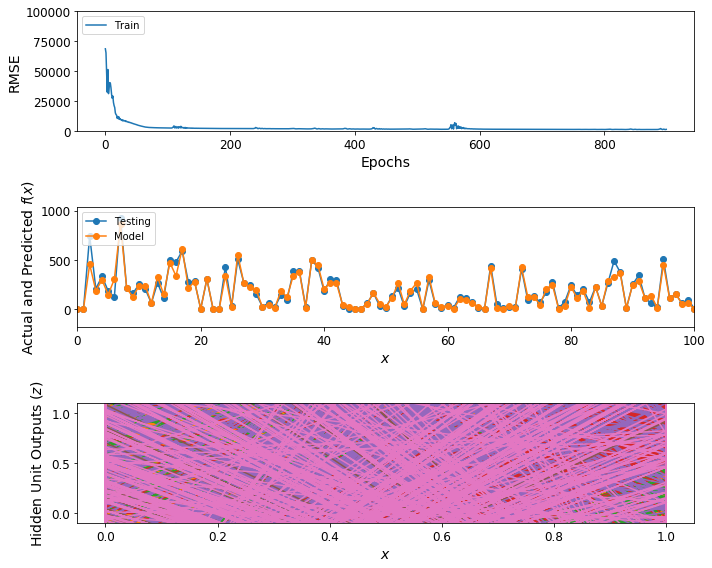

In [799]:
l1 = DL1.Learning(Xtrain, Ttrain, Xtest, Ttest)

In [806]:
DL2 = DL(57,50,50,50,50,1,0.1)

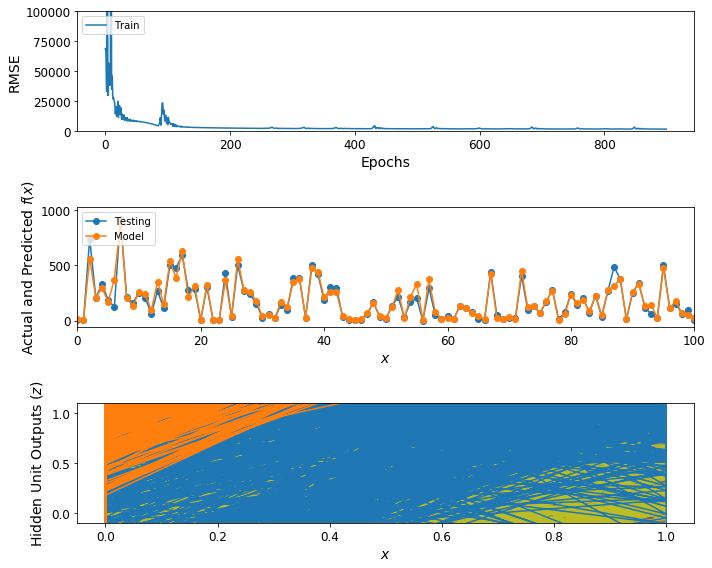

In [807]:
l2 = DL2.Learning(Xtrain, Ttrain, Xtest, Ttest)

In [804]:
DL3 = DL(57,100,100, 100,100, 1, 0.1)

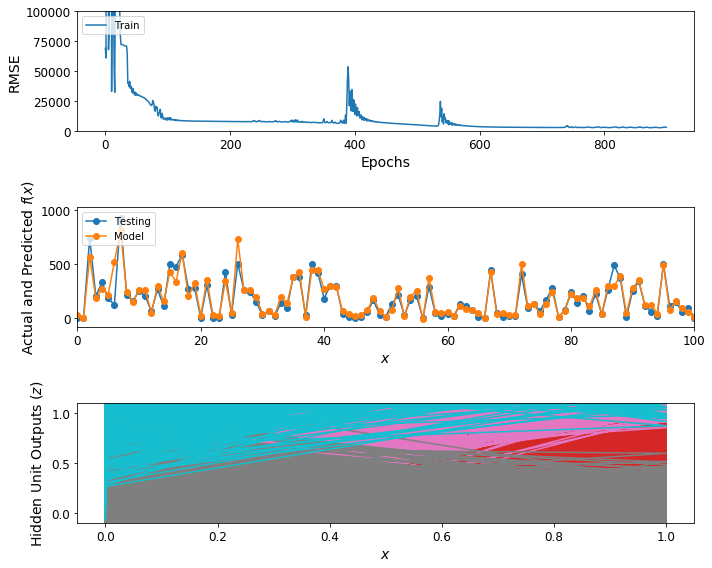

In [805]:
l3 = DL3.Learning(Xtrain, Ttrain, Xtest, Ttest)

#### Discuss about the choice of network structures and performance of it as you change the structures.

From the above three experiments when the structure is set with different value, (57,20,20,20,20,1,0.1), (57,50,50,50,50,1,0.1), (57,100,100,100,100,1,0.1), we can see that (57,50,50,50, 50, 1, 0.1) gives a better performance, from the comparison of RMSE,  (57,50,50,50,50,1,0.1) has a better result than (57,20,20,20,20,1,0.1) and (57,100,100,100,100,1,0.1).

Before the experiment, I expect that (57,100,100,100,100,1,0.1) gives the best result, however, the result shows that (57,100,100,100,100,1,0.1) is not so stable. 

#### What do you think about the results

When choosing the structure of the neural network for deep learning, we need to test and find the best structure, from my experiments, we cannot get a hasty conclusion that more layers means better performance. Actually, the performance is decided by many factors, we need to test and find the best design.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
45 | Methods | 
 |10| Summary of Neural Networks
 | 5| Explanation of codes
 |10| Examination of correct implementation with preliminary test with *explanation (5 pts)*
 |20| Cross validation codes and explanation 
35 | Results | Your Data
| 10| plots for results
| 15| Discussions about parameter/network structure choice 
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
